# Lab 6
## Yanruyu Zhu (yaz4004)
### Github Link: https://github.com/ZhuYRY/5018_DataScience.git


In [9]:
# import library needed
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## 1. Read in both the microarray data (NCI60_data.csv) and the labels of the cancer type (NCI60_labs.csv).

In [3]:
data = pd.read_csv("NCI60_data.csv", index_col=0)
labs = pd.read_csv("NCI60_labs.csv", index_col=0)

In [4]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [5]:
labs.head()

,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST


## 2. We will first do a PCA analysis. Scale, perform PCA, and plot the variance explained and the cumulative variance explained by the PCs. How many PCs are produced in the analysis? Approximately how many PCs are required to explain 90% of the variance in the data? 

Text(0.5, 1.0, 'Variance Explained and Cumulative Variance Explained by the PCs')

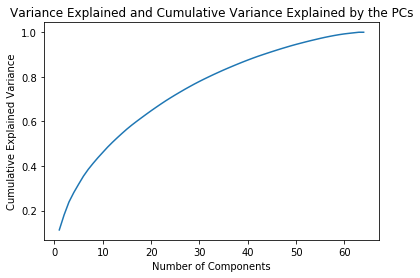

In [6]:
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.fit_transform(data)
y = labs.x

pca = PCA()
pca.fit(data_scaled)

components = np.arange(1,65)
plt.plot(components, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained and Cumulative Variance Explained by the PCs")

#### 64 PCs are produced in the analysis.
####  Approximately 45 PCs are required to explain 90% of the variance in the data.

## 3. Plot the scores on the first versus second PC and the scores on the first versus third PC. Color the scores by cancer type. Interpret your results.

Text(0.5, 1.0, 'Scores on PC1 vs PC2')

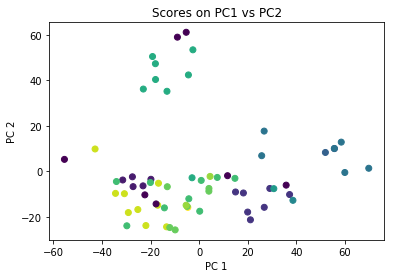

In [13]:
pca_scores = pca.fit_transform(data_scaled)
LE = LabelEncoder()
plt.scatter(pca_scores[:,0], pca_scores[:, 1], c = LE.fit_transform(y))
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Scores on PC1 vs PC2")

Text(0.5, 1.0, 'Scores on PC1 vs PC3')

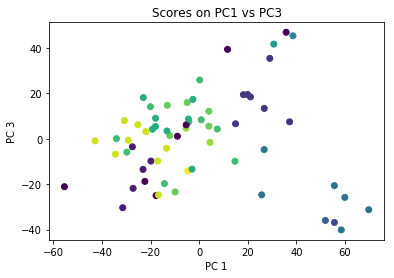

In [30]:
pca_scores = pca.fit_transform(data_scaled)
LE = LabelEncoder()
plt.scatter(pca_scores[:,0], pca_scores[:, 2], c = LE.fit_transform(y))
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.title("Scores on PC1 vs PC3")

#### For both PC1 vs PC2 and PC1 vs PC3, the clusters are not fully dispersed, both are in general ok to be used for distinguishing between classes/cancert types.

## 4. Next we will perform clustering on the data. Visualize the dendogram for hierarchical clustering with complete, average, and single linkage. Label the dendogram with the cancer types. Does the choice of linkage impact the results?

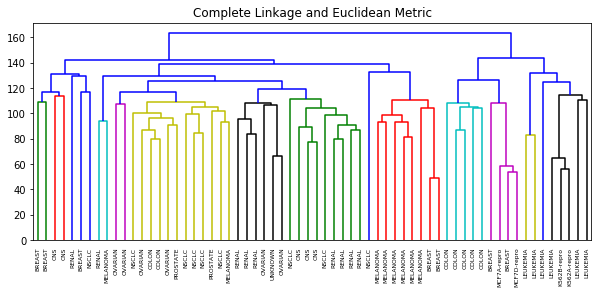

In [7]:
plt.figure(figsize = (10, 4))
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'complete', metric = 'euclidean'), labels=np.array(y))
plt.title('Complete Linkage and Euclidean Metric')
plt.show()

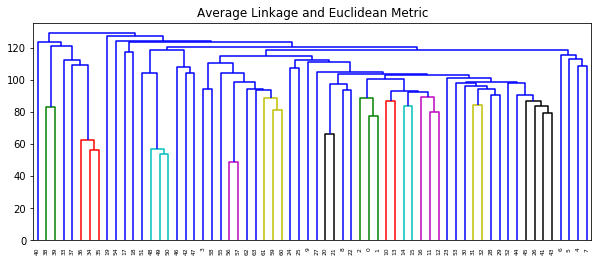

In [36]:
plt.figure(figsize = (10, 4))
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'average', metric = 'euclidean'), labels=np.array(y))
plt.title('Average Linkage and Euclidean Metric')
plt.show()

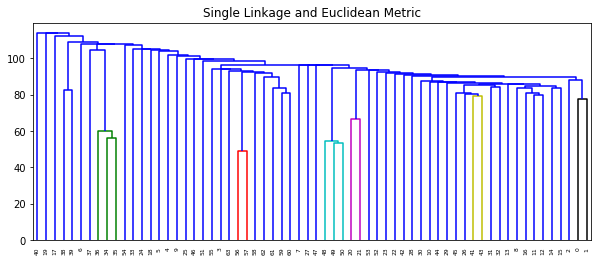

In [37]:
plt.figure(figsize = (10, 4))
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'single', metric = 'euclidean'), labels=np.array(y))
plt.title('Single Linkage and Euclidean Metric')
plt.show()

#### Yes, the choice of linkage impacts the results. For both complete and average linkage, there are clear and distinct groups in the dendrogram. 

## 5. Use complete linkage for the remainder of the analysis. Cluster the observations into 4 groups. Look at the labels for each of the groups and comment on the success of the clustering. 

In [11]:
# AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
# Cluster & Label
c = cluster.fit_predict(data_scaled)
dc = {'clusters': c, 'label': y}
# Dataframe
df = pd.DataFrame(data = dc)
df["count"] = 1
df.groupby(["clusters", "label"]).count()

count
clusters label             
0        BREAST           2
         CNS              3
         COLON            2
         MELANOMA         8
         NSCLC            8
         OVARIAN          6
         PROSTATE         2
         RENAL            8
         UNKNOWN          1
1        K562A-repro      1
         K562B-repro      1
         LEUKEMIA         6
2        BREAST           2
         COLON            5
         MCF7A-repro      1
         MCF7D-repro      1
3        BREAST           3
         CNS              2
         NSCLC            1
         RENAL            1

#### Some of the types of cancers are spread out amongst clusters. For example, Breast cancer is prevalent in the first, third and fourth clusters; CNS is in first and fourth clusters, COLON is in first and third clusters; NSCLC is in the first and fourth clusters; and RENAL is in first and foruth clusters, LEUKEMIA is surprisingly all in the second cluster. The other types of cancers are mostly in a specific cluster. 

## 6. Rather than performing hierarchical clustering on the entire data matrix, we can simply perform hierarchical clustering on the first few principal component score vectors. Sometimes performing clustering on the first few principal component score vectors can give better results than performing clustering on the full data. Perform hierarchical clustering on the first 5 principal component scores and comment on the results.

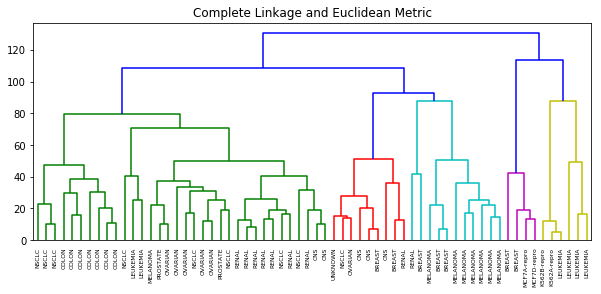

In [15]:
plt.figure(figsize = (10,4))
dend = shc.dendrogram(shc.linkage(pd.DataFrame(pca_scores[:,:5]), method = "complete", metric = "euclidean"), labels=np.array(y))
plt.title("Complete Linkage and Euclidean Metric")
plt.show()

In [16]:
# AgglomerativeClustering
cluster2=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
# Cluster & Label
b=cluster2.fit_predict(pd.DataFrame(pca_scores[:,:5]))
c={'clusters': b, 'label': y}
# Dataframe
d=pd.DataFrame(data=c)
d["count"]=1
d.groupby(["clusters","label"]).count()

count
clusters label             
0        BREAST           3
         MELANOMA         7
         RENAL            1
1        K562A-repro      1
         K562B-repro      1
         LEUKEMIA         4
2        BREAST           2
         MCF7A-repro      1
         MCF7D-repro      1
3        CNS              2
         COLON            7
         LEUKEMIA         2
         MELANOMA         1
         NSCLC            8
         OVARIAN          5
         PROSTATE         2
         RENAL            7
4        BREAST           2
         CNS              3
         NSCLC            1
         OVARIAN          1
         RENAL            1
         UNKNOWN          1

#### Performing hierarchical clustering on the first 5 principal component scores makes the dendrogram create the clusters (indicated with unique colors) without any overlap and in clear seperated clusters. However, when we look at how our labels were clustered, we see that for the most part, the labels were spread out between the clusters.

